In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.preprocessing import Normalizer
from KMeans import *

In [2]:
iris_test_data = pd.read_csv('iris_new_data.csv', delim_whitespace = True, header = None)
dataset_test = pd.DataFrame.to_numpy(iris_test_data)

In [3]:
transform = Normalizer().fit(dataset_test)  
dataset_test = transform.transform(dataset_test)
print(dataset_test[0:10][0:10])

[[0.77381111 0.59732787 0.2036345  0.05430253]
 [0.77867447 0.59462414 0.19820805 0.02831544]
 [0.76578311 0.60379053 0.22089897 0.0147266 ]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.69299099 0.34199555 0.60299216 0.19799743]
 [0.71578999 0.34430405 0.5798805  0.18121266]
 [0.76693897 0.57144472 0.28572236 0.06015208]
 [0.8068282  0.53788547 0.24063297 0.04246464]]


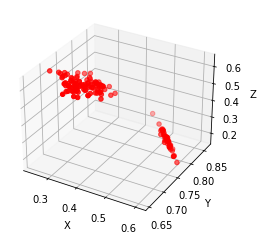

In [4]:
figure = plt.figure()
plot = figure.add_subplot(projection = '3d')
plot.scatter(dataset_test[:, 1], dataset_test[:, 0], dataset_test[:, 2], c = 'red')
plot.set_xlabel('X')
plot.set_ylabel('Y')
plot.set_zlabel('Z')
plt.show()

In [5]:
error = np.zeros((10, 3))
label = np.zeros((10, 150))
centroid = np.zeros((10, 3, 4))

for i in range(10):
    KMeansIris = KMeans(X = dataset_test, K = 3, F = 4)
    KMeansIris.ArbitraryCentroid()
    error[i], label[i], centroid[i] = KMeansIris.Main(iteration = 30)

100%|██████████| 30/30 [00:00<00:00, 4165.98it/s]


In [6]:
print('Error: \n', error)
TotalError = error.sum(axis = 1)
print('TotalError: \n', TotalError)
OptimalKMeans = np.argmin(TotalError)
print('OptimalKMeans: \n', TotalError[OptimalKMeans])

Error: 
 [[6.25563126 0.81100471 0.84560128]
 [6.25563126 0.81100471 0.84560128]
 [2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [2.03316191 2.49441473 1.71728029]
 [2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [2.03316191 2.49441473 1.71728029]]
TotalError: 
 [7.91223726 7.91223726 6.24485693 7.91223726 6.24485693 6.24485693
 7.91223726 6.24485693 7.91223726 6.24485693]
OptimalKMeans: 
 6.244856927285264


In [7]:
predictions = label[OptimalKMeans].astype(int)

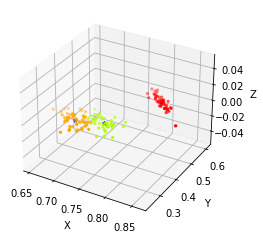

In [8]:
matplotlib_axes_logger.setLevel('ERROR')
figure = plt.figure()
plot = figure.add_subplot(projection = '3d')
cmap = plt.cm.get_cmap('hsv', 10)

for i in range(3):
    plot.scatter(dataset_test[label[OptimalKMeans] == i][:, 0], dataset_test[label[OptimalKMeans] == i][:, 1], s = 5, c = cmap(i))
    plot.scatter(centroid[OptimalKMeans][i, 0], centroid[OptimalKMeans][i, 1], marker = '*', s = 15, c = 'blue')
    
plot.set_xlabel('X')
plot.set_ylabel('Y')
plot.set_zlabel('Z')
plt.show()

In [9]:
np.savetxt("format_iris" + ".txt", predictions, fmt = '%s')